# Modelo RANDOM FOREST

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import os

In [2]:
SEED = 42
ruta_carpeta_actual = os.getcwd()
ruta_carpeta_raiz = os.path.dirname(ruta_carpeta_actual)
csv_path  = os.path.join(ruta_carpeta_raiz, "dataset", "PuntosMuestra_CR_2023.csv")
df = pd.read_csv(csv_path)
# c:\Users\Fran\Documents\2025-2_Seminario2\Uso-de-Inteligencia-Artificial-Geoespacial-para-Clasificar-Coberturas-Terrestres-en-Costa-Rica\dataset\PuntosMuestra_CR_2023.csv

## Limpieza

In [3]:
# Quitar valores de la CATEGORIA = 2
df_filtrado = df[df["CATEGORIA"] != 2]

y = df_filtrado["CATEGORIA"]
X = df_filtrado.drop(columns=["CATEGORIA", "lon", "lat", "year"])

## Definir modelo

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

## Entrenamiento y medir su tiempo

In [5]:
t0_fit = time.perf_counter()
rf.fit(X_train, y_train)
t1_fit = time.perf_counter()

t0_pred = time.perf_counter()
y_pred = rf.predict(X_test)
t1_pred = time.perf_counter()

train_time_s = t1_fit - t0_fit
pred_time_s  = t1_pred - t0_pred
pred_ms_per_sample = (pred_time_s / len(y_test)) * 1000


## Prueba y Resultados

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, confusion_matrix, classification_report

oa = accuracy_score(y_test, y_pred)
prec, rec, f1m, _ = precision_recall_fscore_support(y_test, y_pred, average="macro", zero_division=0)
cm  = confusion_matrix(y_test, y_pred)
cm_row_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
cm_row_percentage = np.nan_to_num(cm_row_percentage)  # handle division by zero

print(f"⏱ Test: {pred_time_s:.3f}s  ({pred_ms_per_sample:.2f} ms/muestra)")
print(f"OA: {oa:.4f} | Prec(macro): {prec:.4f} | Recall(macro): {rec:.4f} | F1-macro: {f1m:.4f}")
print("Matriz de confusión:\n", cm)

⏱ Test: 0.061s  (0.01 ms/muestra)
OA: 0.8826 | Prec(macro): 0.8389 | Recall(macro): 0.7972 | F1-macro: 0.8161
Matriz de confusión:
 [[2225  226    1    2    0    5]
 [ 170 4267    3    5   10  113]
 [   8    1  317   10    0    0]
 [   4   13   10  258   31   38]
 [  27   53    0   11  259   62]
 [  25  143    0   18   39  406]]


### Matriz de confusion

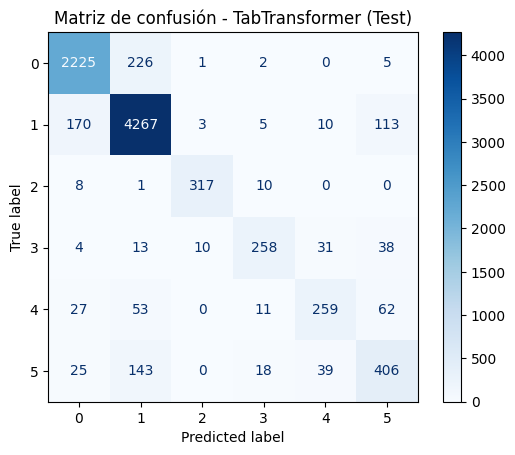

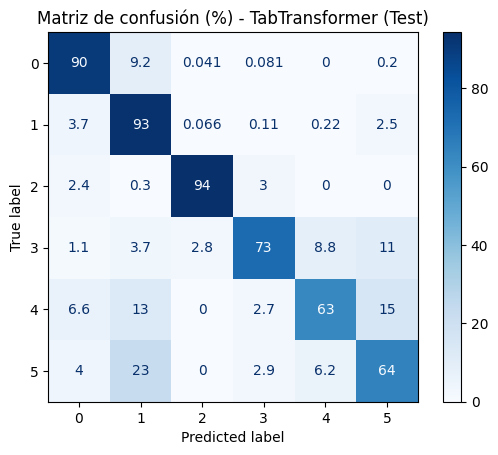

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Matriz de confusión - TabTransformer (Test)")
plt.show()

ConfusionMatrixDisplay(cm_row_percentage).plot(cmap='Blues')
plt.title("Matriz de confusión (%) - TabTransformer (Test)")
plt.show()


# Registrar informacion